In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


In [157]:
income=pd.read_csv('census_income.csv', names=['age', 'workClass', 'fnlwgt', 'education', "education-num","marital-status", 'occupation', 'relationship',
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])

In [158]:
income.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [159]:
income.tail()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [160]:
income.shape

(32561, 15)

In [161]:
income.isnull().sum()

age               0
workClass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [162]:
income.columns

Index(['age', 'workClass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [163]:
income.shape

(32561, 15)

In [164]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [165]:
income['income'].value_counts()

           

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [166]:
#Normalize can be set to true to print the praportions instead of numbers
income['income'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

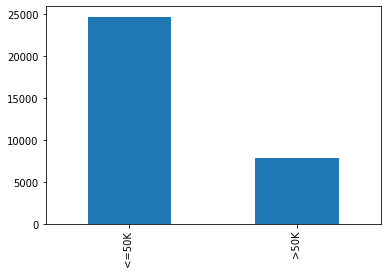

In [167]:
income['income'].value_counts().plot.bar()

In [168]:
income['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

In [169]:
income['age'].max()

90

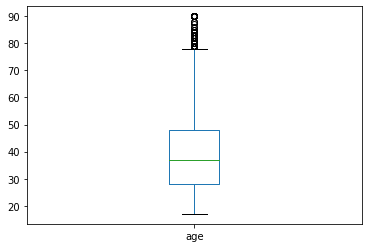

In [170]:
income['age'].plot(kind='box')

In [171]:
income['age'].min()

17

In [172]:
income['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64

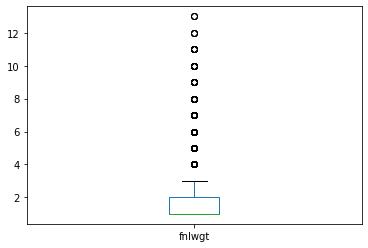

In [173]:
income['fnlwgt'].value_counts().plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275BF2AFEC8>,
      dtype=object)

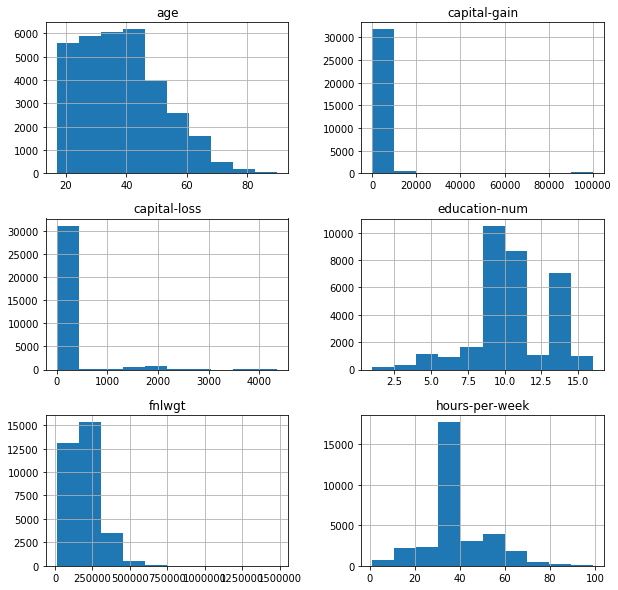

In [174]:
income.hist(figsize=(10,10))

In [175]:
income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [176]:
cat_attributes = income.select_dtypes(include=['object'])
print(cat_attributes.columns)
['workClass', 'education','marital-status','occupation','relationship', 'race', 'sex','native-country' 'income']

Index(['workClass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


['workClass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-countryincome']

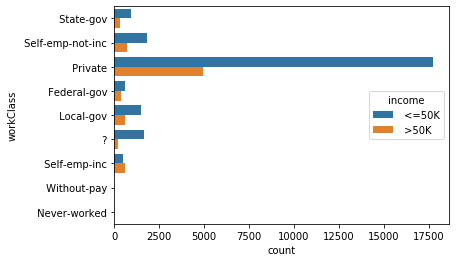

In [177]:
sns.countplot(y='workClass', hue='income', data = cat_attributes)

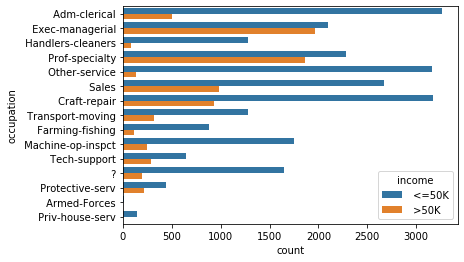

In [178]:
sns.countplot(y='occupation', hue='income', data = cat_attributes)

In [229]:
cor=income.corr()
cor

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.036527,0.077674,0.057775,0.068756
education-num,0.036527,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,0.148123,0.078409,0.054256,1.000000


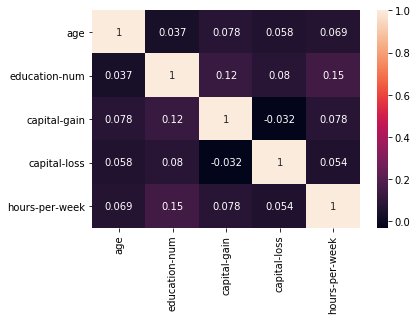

In [230]:
sns.heatmap(income.corr(),annot=True)

In [179]:
import io
import requests
import pickle
import os
%matplotlib inline
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score

In [180]:
income.drop(['fnlwgt', 'education'], axis=1, inplace=True)


In [181]:
x=income.iloc[:,:-1]
x.head()

,age,workClass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [214]:
y=income.iloc[:,-1]

y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [215]:
x.shape

(32561, 91)

In [216]:
y.shape

(32561,)

In [217]:
y=y.values.reshape(-1,1)

In [218]:
x=pd.get_dummies(x)

In [219]:
df=pd.get_dummies(income)

In [220]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=50)

In [221]:
lg=LogisticRegression()

In [222]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
pred=lg.predict(test_x)
print(pred)

[' <=50K' ' >50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']


In [224]:
print("accuracy_score:",accuracy_score(test_y,pred))

accuracy_score: 0.8412897822445561


Text(33.0, 0.5, 'Actual classes')

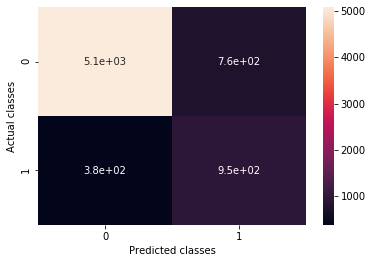

In [225]:
cfm = confusion_matrix(pred,test_y)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [226]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      5460
        >50K       0.71      0.56      0.62      1704

    accuracy                           0.84      7164
   macro avg       0.79      0.74      0.76      7164
weighted avg       0.83      0.84      0.83      7164



In [227]:
cross_val_model = LogisticRegression(random_state=0)
scores = cross_val_score(cross_val_model, train_x, 
         train_y, cv=5)
print(np.mean(scores))

0.8282867310664725


In [ ]:
from sklearn.externals import joblib
joblib.dump(lg,'census_income_project.pkl')